In [2]:
from pathlib import Path
import numpy as np
import matplotlib.pylab as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams["mathtext.fontset"] = "cm"

In [15]:
def susceptibility_noninteracting(temperature: np.ndarray, coupling_energy: float):
        sech = 1.0 / np.cosh(coupling_energy / (2.0 * temperature))
        return sech * sech

def fitting_function(temperature: np.ndarray, angular_frequency, curie_temperature: float,
                     ln_attempt_time1: float,
                     activation_energy1: float,
                     coupling_energy1: float,
                     populations1: np.ndarray,
                     emat0: float, emat1: float,
                     bare0: float, bare1: float, bare2: float, 
                     td0: float, td1: float, td2: float):
    tau1 = np.exp(ln_attempt_time1 + (activation_energy1) / temperature)     # shape (num_relax_times, 1, 1)
    temperature_300 = temperature - 300.0
    temperature_curie_inv = 1. / (temperature - curie_temperature)
    omega_tau1 = angular_frequency * tau1
    real1 = populations1 * susceptibility_noninteracting(temperature, coupling_energy1) / (1.0 + omega_tau1 * omega_tau1) * temperature_curie_inv
    imag1 = real1 * omega_tau1
    geometric_factor = bare0 / 4.8
    capacitance = geometric_factor * ((emat0 - 1) + emat1 * temperature + real1)
    imaginary_capacitance = geometric_factor * imag1
    
    return capacitance, imaginary_capacitance

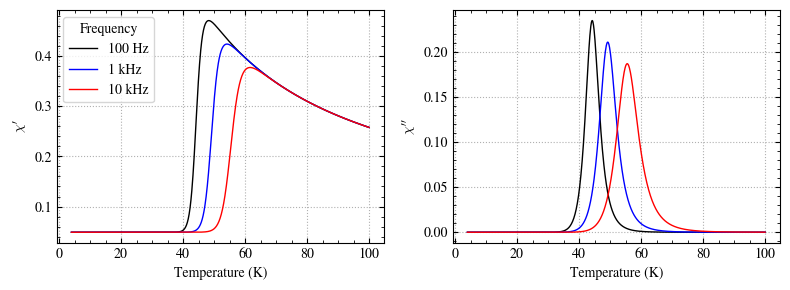

In [18]:
temperature = np.linspace(4, 100, 1000)
temperature = np.stack((temperature, temperature, temperature)).T
frequencies = np.array([100, 1000, 10000])
freq_num = len(frequencies)
colors = ["k", "b", "r"]

capacitance, imaginary_capacitance = fitting_function(temperature, frequencies * 2 * np.pi, 0, -29,
                                                      1000, 0, 100, 1.235, 1e-5, 1, 0, 0, 0, 0, 0)

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
# axes[0].set_title()
for ax in axes:
    ax.grid(linestyle='dotted')
    ax.set_xlabel('Temperature (K)')
    ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
    ax.tick_params(axis="both", which="both", direction="in", top=True, right=True)

axes[0].set_ylabel("$\\chi'$")
axes[1].set_ylabel("$\\chi''$")
for ii in range(freq_num):
    freq_name = str(int(frequencies[ii]))
    if len(freq_name) > 3:
        freq_name = freq_name[:-3] + " kHz"
    else:
        freq_name += " Hz"
    axes[0].plot(temperature[:, ii], capacitance[:, ii], linewidth=1, color=colors[ii],
                    label=freq_name)
    axes[1].plot(temperature[:, ii], imaginary_capacitance[:, ii], linewidth=1, color=colors[ii])
axes[0].legend(title="Frequency")
fig.tight_layout()
fig.savefig("example.png", dpi=600, bbox_inches="tight")